# 1. Install Dependencies and Setup

In [53]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aiohttp-retry                     2.9.1
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid           

In [55]:
import tensorflow as tf
import os

In [56]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [57]:
#tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [58]:
import cv2
import imghdr

In [59]:
data_dir = 'D:/clones/ImageClassification-main/data' 

In [60]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [61]:
import os
print(os.getcwd())


c:\Users\Yugesh\Desktop\intern\elite tech\project


In [62]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [63]:
import numpy as np
from matplotlib import pyplot as plt

In [64]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [65]:
data_iterator = data.as_numpy_iterator()

In [66]:
batch = data_iterator.next()

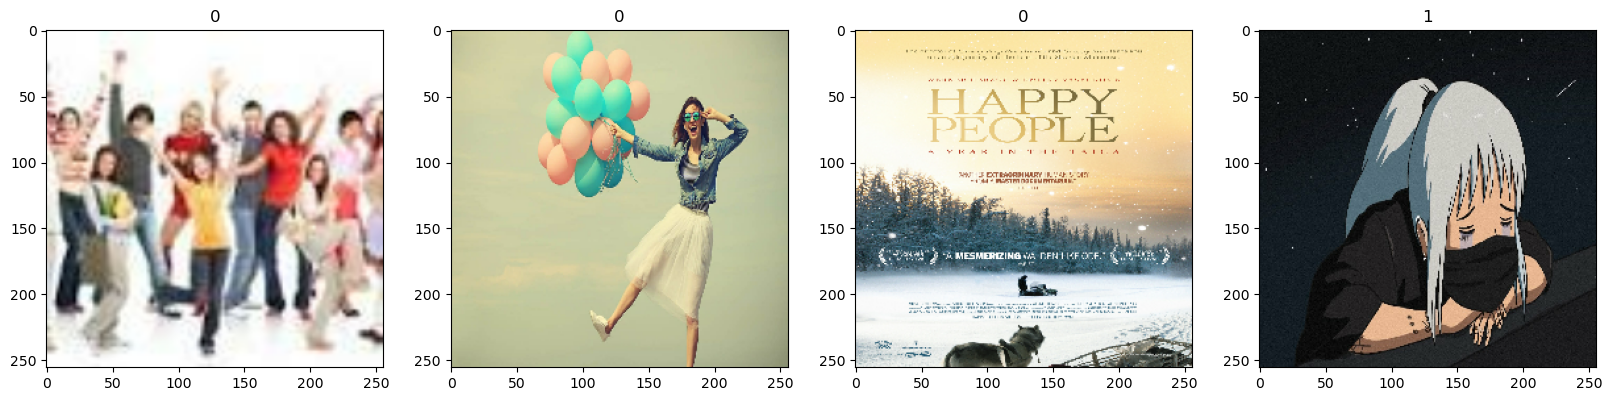

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [68]:
data = data.map(lambda x,y: (x/255, y))

In [69]:
data.as_numpy_iterator().next()

(array([[[[0.7372549 , 0.7411765 , 0.75686276],
          [0.7941176 , 0.7980392 , 0.8137255 ],
          [0.827451  , 0.8392157 , 0.85882354],
          ...,
          [0.62712544, 0.61536074, 0.5957529 ],
          [0.6228784 , 0.61111367, 0.5915058 ],
          [0.61503524, 0.60327053, 0.5836627 ]],
 
         [[0.7411765 , 0.74509805, 0.7607843 ],
          [0.7921569 , 0.79607844, 0.8117647 ],
          [0.8254902 , 0.8372549 , 0.8568627 ],
          ...,
          [0.6313726 , 0.61960787, 0.6       ],
          [0.6215763 , 0.6098116 , 0.59020376],
          [0.61960787, 0.60784316, 0.5882353 ]],
 
         [[0.730373  , 0.74835324, 0.76011795],
          [0.78201973, 0.8       , 0.8117647 ],
          [0.8215686 , 0.84117645, 0.85294116],
          ...,
          [0.63529414, 0.62352943, 0.6039216 ],
          [0.62419575, 0.61243105, 0.5928232 ],
          [0.6219018 , 0.6101371 , 0.59052926]],
 
         ...,
 
         [[0.29215688, 0.27254903, 0.25686276],
          [0.29803

# 5. Split Data

In [70]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [71]:
train_size

7

In [72]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [73]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [75]:
model = Sequential()

In [76]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Yugesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [79]:
logdir='logs'

In [80]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [81]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.4567 - loss: 1.3244 - val_accuracy: 0.5312 - val_loss: 0.6623
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.5116 - loss: 0.6725 - val_accuracy: 0.4688 - val_loss: 0.6480
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.5169 - loss: 0.6345 - val_accuracy: 0.6719 - val_loss: 0.5840
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.6754 - loss: 0.6306 - val_accuracy: 0.7031 - val_loss: 0.5095
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.7604 - loss: 0.5331 - val_accuracy: 0.8438 - val_loss: 0.3750
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7362 - loss: 0.5054 - val_accuracy: 0.6875 - val_loss: 0.5612
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.6782 - loss: 0.5602 - val_accuracy: 0.6719 - val_loss: 0.5120
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.6785 - loss: 0.5189 - val_accuracy: 0.8906 - val_loss:

# 8. Plot Performance

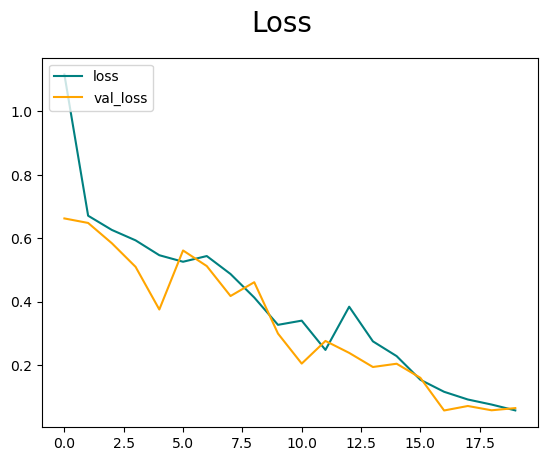

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

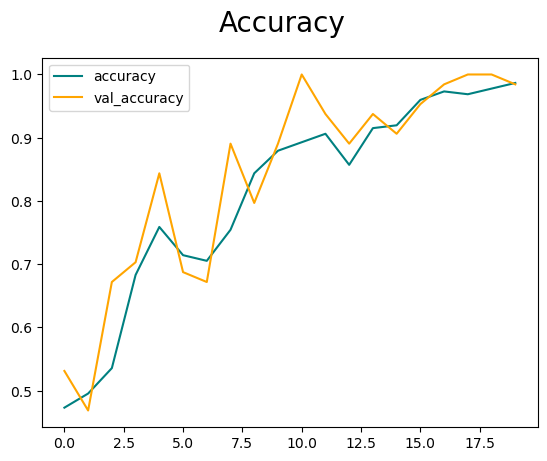

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [84]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [85]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [86]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [87]:
print(f"Precision : {pre.result()}\n Recall : {re.result()}\n Binary Accuracy : {acc.result()}")

Precision : 1.0
 Recall : 1.0
 Binary Accuracy : 1.0


# 10. Test

In [88]:
import cv2

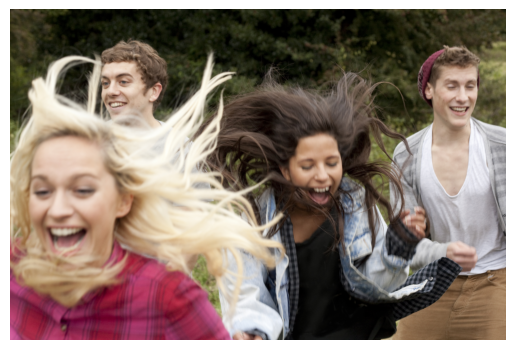

In [89]:
img = cv2.imread('db/happy_example.jpg')
if img is None:
    print("Image not found or path is incorrect.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

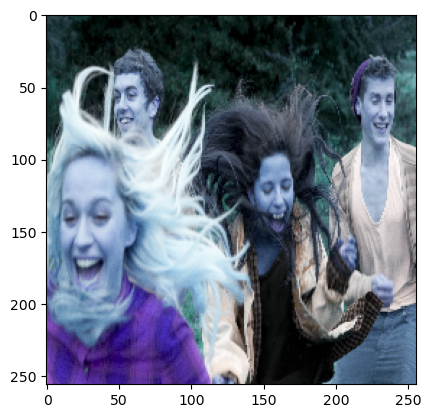

In [90]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [92]:
yhat

array([[0.07987068]], dtype=float32)

In [93]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','imageclassifier.h5'))

In [96]:
from keras.models import load_model


In [97]:

new_model = load_model('D:/clones/ImageClassification-main/models/imageclassifier.h5', compile=False)

In [98]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[0.09202779]], dtype=float32)